📝Predicting diabetes
This data set originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict, based on diagnostic measures, whether or not a patient has diabetes.

🧐 Hypothesys - What are we looking for?

We want to check if there is a significant relationship between the variables Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age and the class variable Outcome in the data set. It is hypothesized that certain values ​​or combinations of values ​​in these variables may be associated with an increased risk of suffering from diabetes, and that, therefore, these variables could be used to develop a predictive model for the probability of diabetes in...hypotheses, will be carried out Statistical analyses, such as regressions and significance tests, to evaluate the strength and direction of associations between the independent variables (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) and the dependent variable (Outcome). If the significant relationship is confirmed, a predictive model could be developed that uses these variables to estimate the probability of suffering from diabetes in a population.

📚Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

Data Ingestion

In [2]:
link = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
total_data = pd.read_csv(link)
total_data.to_csv('diabetes.csv', index=False)


Data variables dictionary:

✅Pregnancies. Número de embarazos del paciente (numérico)

✅Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)

✅BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)

✅SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)

✅Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)

✅BMI. Índice de masa corporal (numérico)

✅DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)

✅Age. Edad del paciente (numérico)

💥Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

Data exploration and descriptive analysis

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 8 variables in the dataset and they are all numerical, the dependent variable is outcome which returns the values ​​0 and 1 that we will interpret in a Boolean way.

In [4]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check duplicates

In [5]:
print(total_data.duplicated().sum())

0


No duplicates found there

In [7]:
'''#Reset index
total_data.reset_index(drop=True, inplace=True)'''

🚀 Descriptive data analysis

In [6]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



These results show descriptive statistics for each column in the dataset, which appears to be related to diabetes. Here's an interpretation of the results:

✅Pregnancies:

Mean: 3.85
Standard Deviation: 3.37
Minimum: 0
25th Percentile: 1
Median: 3
75th Percentile: 6
Maximum: 17

✅Glucose:

Mean: 120.89
Standard Deviation: 31.97
Minimum: 0
25th Percentile: 99
Median: 117
75th Percentile: 140.25
Maximum: 199

✅BloodPressure:

Mean: 69.11
Standard Deviation: 19.36
Minimum: 0
25th Percentile: 62
Median: 72
75th Percentile: 80
Maximum: 122

✅SkinThickness:

Mean: 20.54
Standard Deviation: 15.95
Minimum: 0
25th Percentile: 0
Median: 23
75th Percentile: 32
Maximum: 99

✅Insulin:

Mean: 79.80
Standard Deviation: 115.24
Minimum: 0
25th Percentile: 0
Median: 30.5
75th Percentile: 127.25
Maximum: 846

✅BMI (Body Mass Index):

Mean: 31.99
Standard Deviation: 7.88
Minimum: 0
25th Percentile: 27.3
Median: 32
75th Percentile: 36.6
Maximum: 67.1

✅DiabetesPedigreeFunction:

Mean: 0.47
Standard Deviation: 0.33
Minimum: 0.078
25th Percentile: 0.24375
Median: 0.3725
75th Percentile: 0.62625
Maximum: 2.42

✅Age:

Mean: 33.24
Standard Deviation: 11.76
Minimum: 21
25th Percentile: 24
Median: 29
75th Percentile: 41
Maximum: 81

✅Outcome:

Mean: 0.35
Standard Deviation: 0.48
Minimum: 0
25th Percentile: 0
Median: 0
75th Percentile: 1
Maximum: 1

🚀 EDA

EXPLORING VARIABLES

In [7]:
#Verify null values
total_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no null values

👉 Univariate analysis

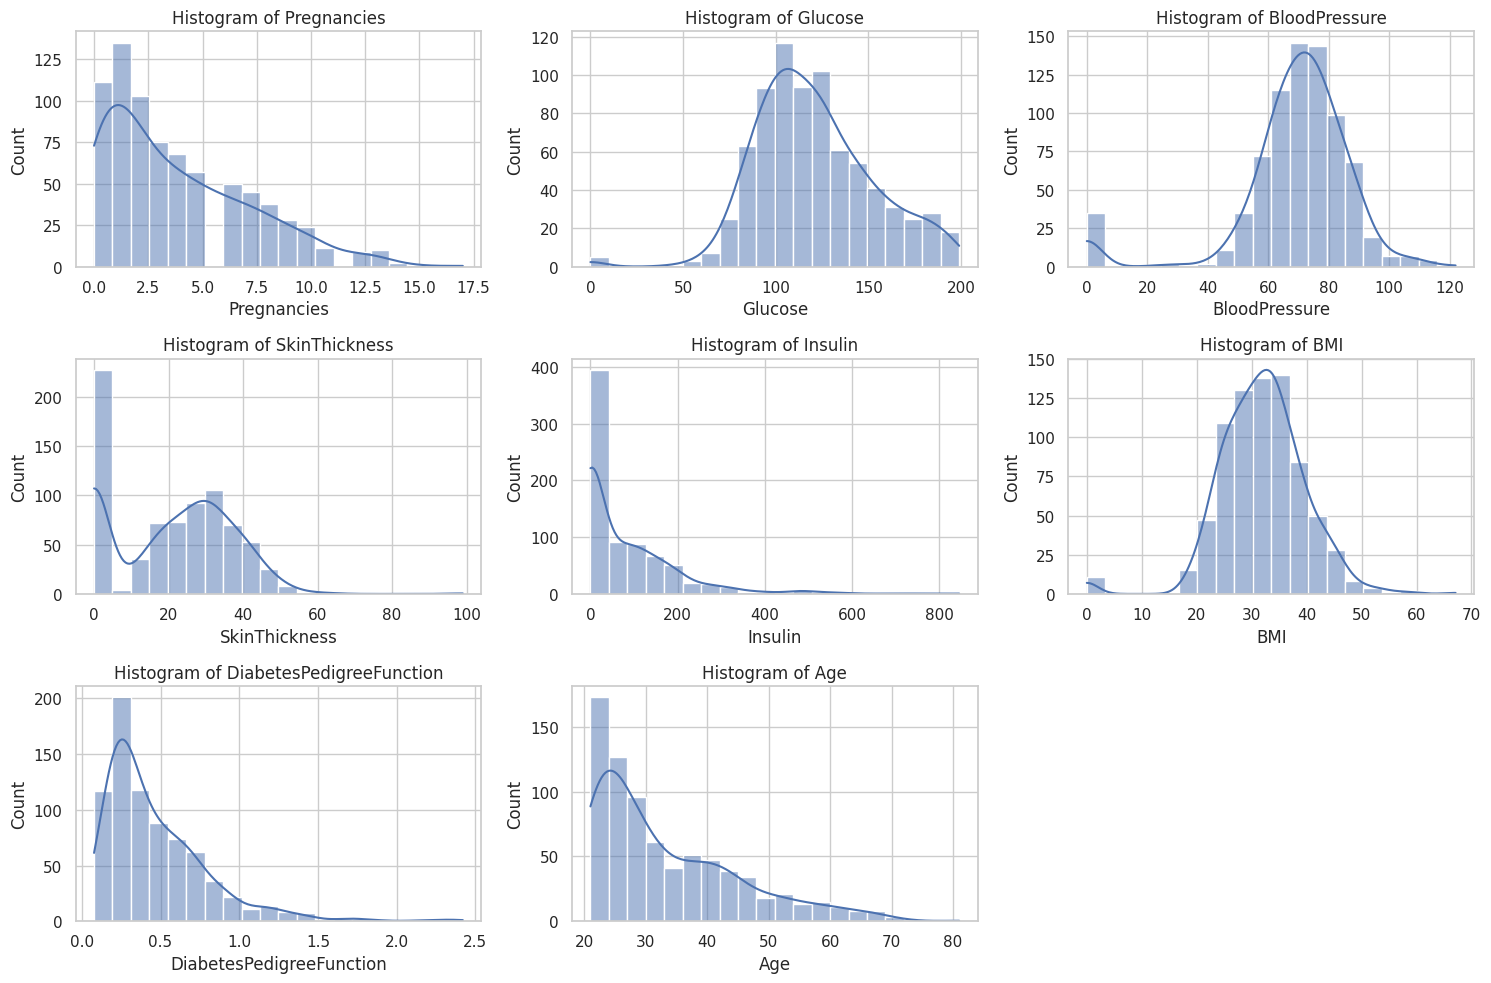

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Numeric variables
numeric_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Create histograms for each
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(total_data[variable], bins=20, kde=True)
    plt.title(f'Histogram of {variable}')

plt.tight_layout()
plt.show()


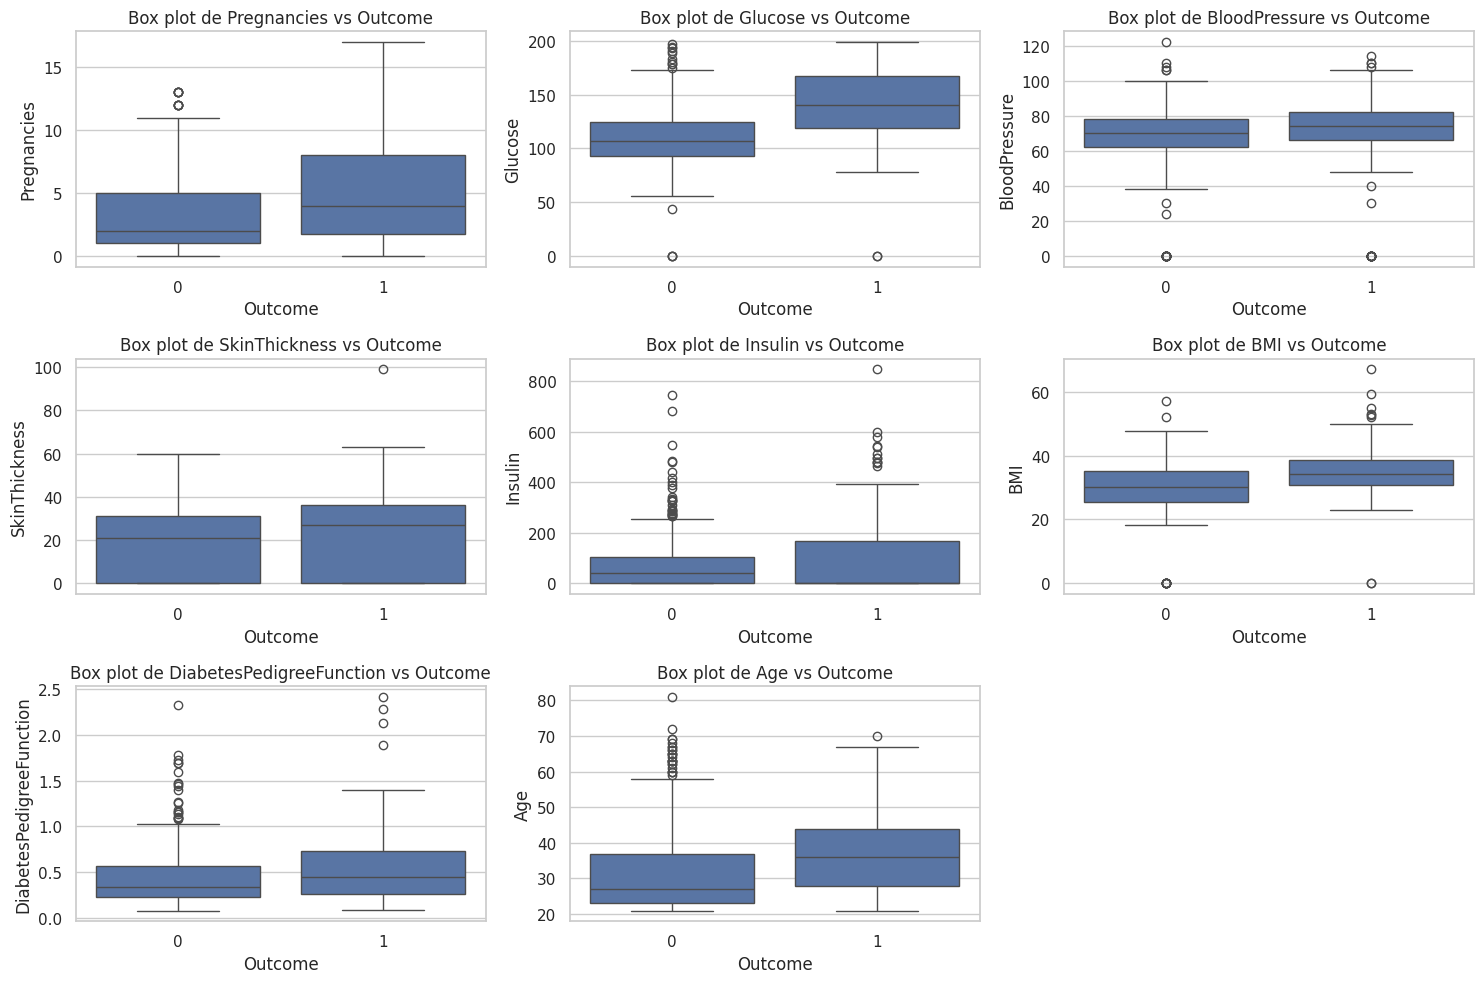

In [9]:
# box plots
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numeric_variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=variable, data=total_data)
    plt.title(f'Box plot de {variable} vs Outcome')
plt.tight_layout()
plt.show()

👉 Multivariate analysis

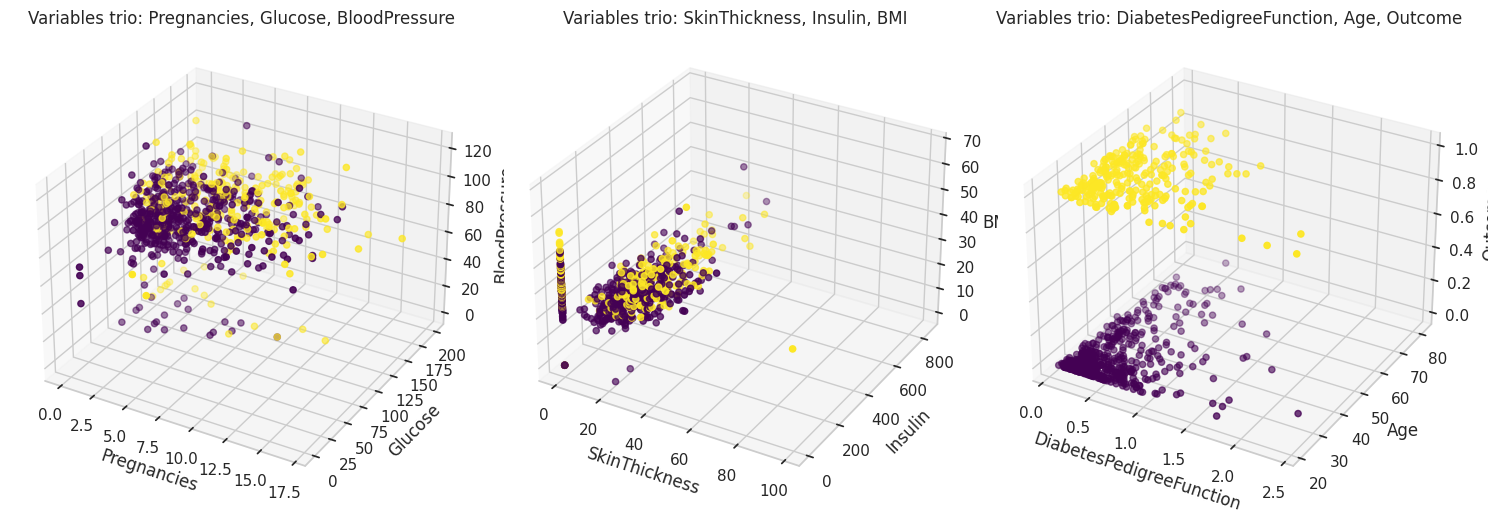

In [10]:
# Create 3D graphs using matplotlib
from mpl_toolkits.mplot3d import Axes3D

# Select trios variables
trios_variables = [
    ["Pregnancies", "Glucose", "BloodPressure"],
    ["SkinThickness", "Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age", "Outcome"]
]

# Creating 3D graphs
fig = plt.figure(figsize=(15, 5))

for i, trio in enumerate(trios_variables, start=1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.scatter(total_data[trio[0]], total_data[trio[1]], total_data[trio[2]], c=total_data["Outcome"], cmap='viridis')
    ax.set_xlabel(trio[0])
    ax.set_ylabel(trio[1])
    ax.set_zlabel(trio[2])
    ax.set_title(f'Variables trio: {trio[0]}, {trio[1]}, {trio[2]}')

plt.tight_layout()
plt.show()

👉 Comparing by trios 🧛‍♂️🧚‍♀️🧙‍♂️

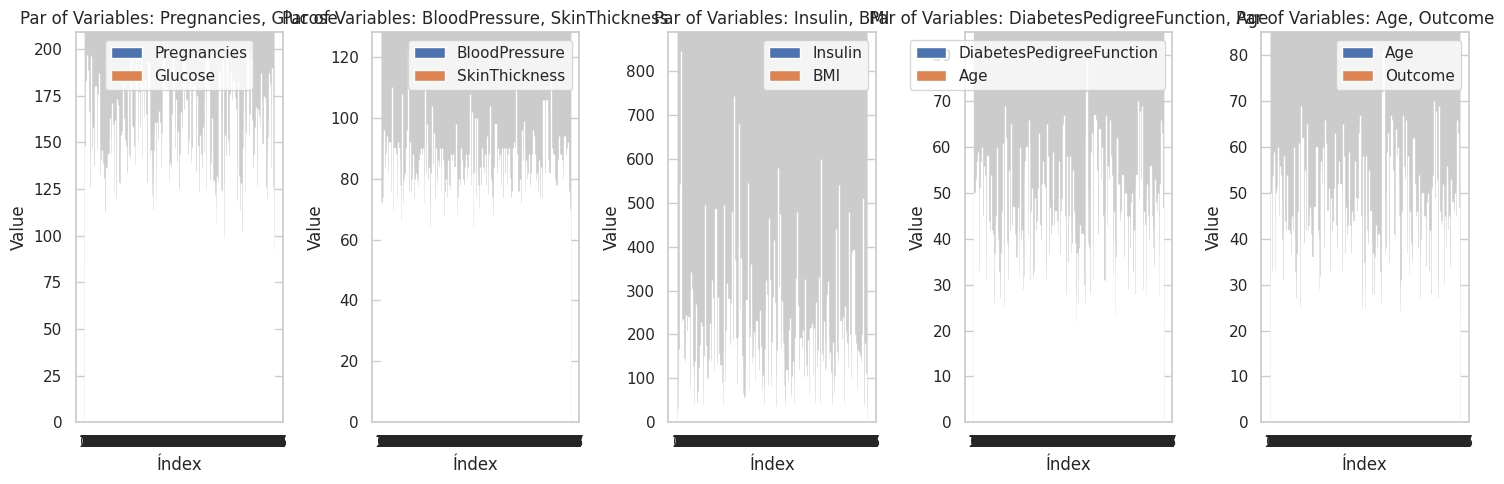

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Selecting by par
pares_variables = [
    ["Pregnancies", "Glucose"],
    ["BloodPressure", "SkinThickness"],
    ["Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age"],
    ["Age", "Outcome"]
]

# Create Clustered Bar Subcharts
fig, axes = plt.subplots(nrows=1, ncols=len(pares_variables), figsize=(15, 5))

for i, par in enumerate(pares_variables):
    # Config bars and labels
    positions = np.arange(len(total_data))

    # Config width of bars
    width = 0.4

    # Create agruping bars
    for j, variable in enumerate(par):
        axes[i].bar(positions + j * width, total_data[variable], width, label=variable)

    # Config labels and legends
    axes[i].set_xticks(positions + width / 2)
    axes[i].set_xticklabels(total_data.index)
    axes[i].set_xlabel('Índex')
    axes[i].set_ylabel('Value')
    axes[i].set_title(f'Par of Variables: {", ".join(par)}')
    axes[i].legend()

plt.tight_layout()
plt.show()

👉 Comparing by trios 👩‍⚕️👨‍⚕️

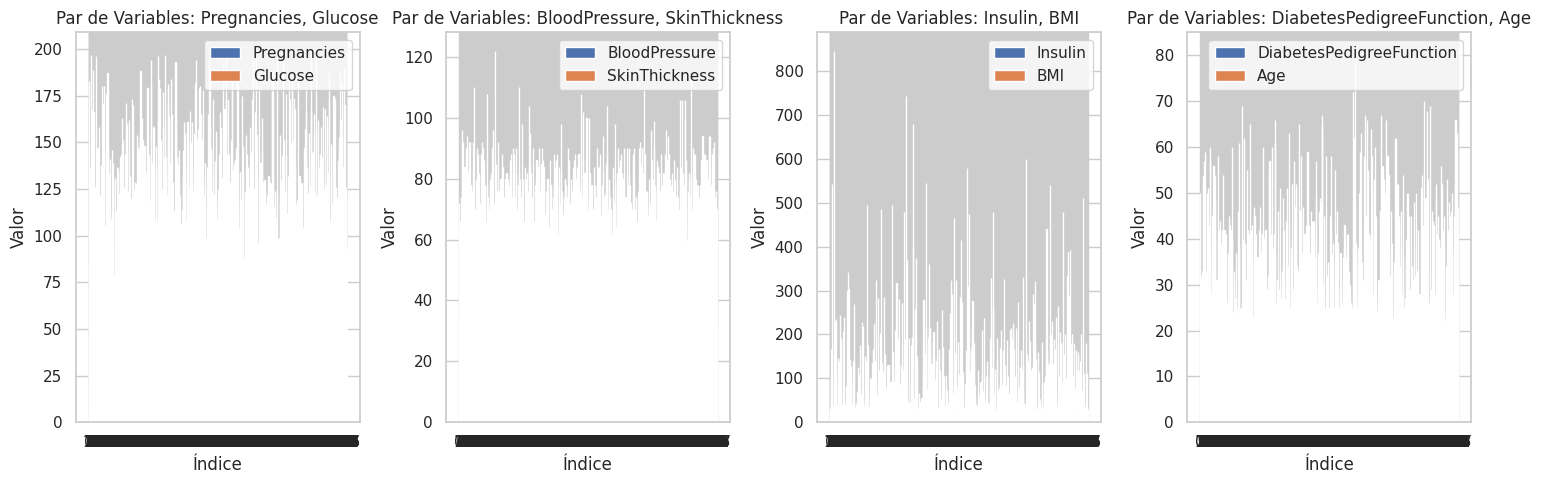

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Selection par of variables to plot
pares_variables = [
    ["Pregnancies", "Glucose"],
    ["BloodPressure", "SkinThickness"],
    ["Insulin", "BMI"],
    ["DiabetesPedigreeFunction", "Age"]
]

# Create Clustered Bar Subcharts
fig, axes = plt.subplots(nrows=1, ncols=len(pares_variables), figsize=(15, 5))

for i, par in enumerate(pares_variables):
    # Configure bar positions
    positions = np.arange(len(total_data))

    # Set the width of the bars
    width = 0.4

    # Create the bar chart
    for j, variable in enumerate(par):
        axes[i].bar(positions + j * width, total_data[variable], width, label=variable)

    # Config labels and legends
    axes[i].set_xticks(positions + width / 2)
    axes[i].set_xticklabels(total_data.index)
    axes[i].set_xlabel('Índice')
    axes[i].set_ylabel('Valor')
    axes[i].set_title(f'Par de Variables: {", ".join(par)}')
    axes[i].legend()

plt.tight_layout()
plt.show()


Once the EDA is completed, we calculate the correlation matrix of the variables with respect to Outcome

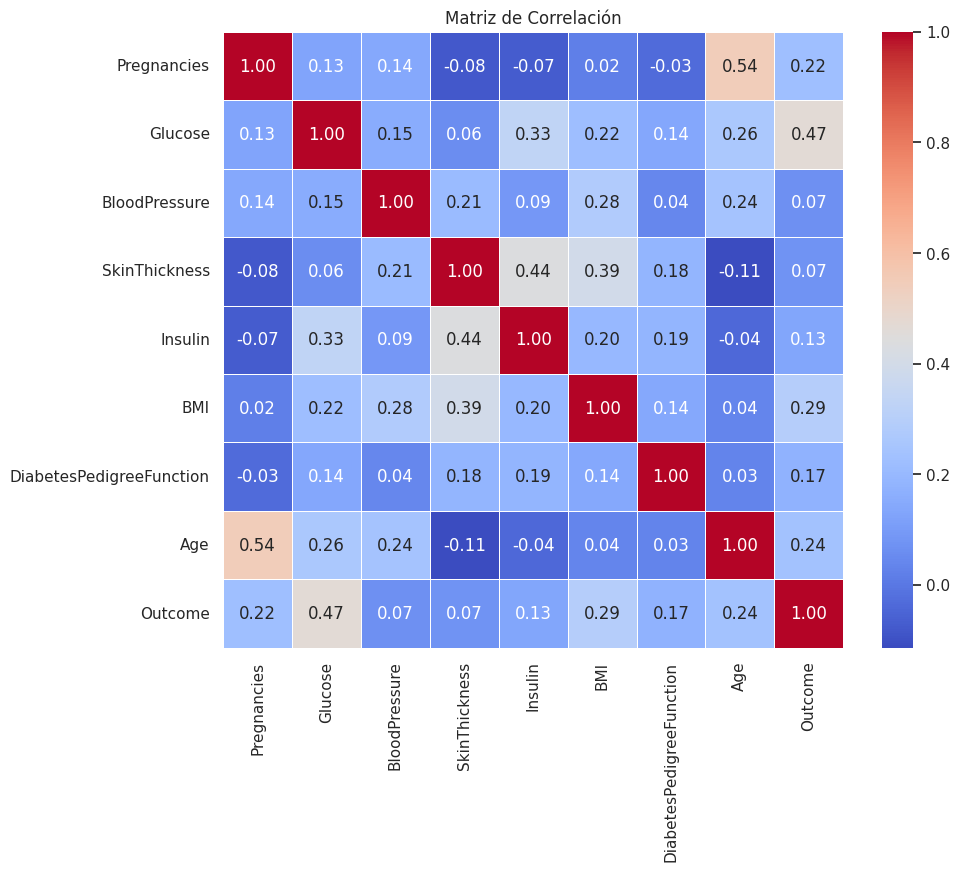

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
correlation_matrix = total_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

👩‍💻Variables con correlacion significativa respecto a outcome

👍Las mayores correlaciones entre Outcome y las variables independietes observadas son: 

👉Glucosa: 47 % 
👉BMI: 29% 
👉AGE: 24 % 
👉Pregnancies: 22 % 


Cálculo numérico de la matriz de correlacion

In [19]:
import pandas as pd

# Create matrix
correlation_matrix = total_data.corr()

# Print the matrix
print("Matriz de Correlación:\n", correlation_matrix)

Matriz de Correlación:
                           Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose          

👩‍🏫 Pair plot (All respect tooutcome)

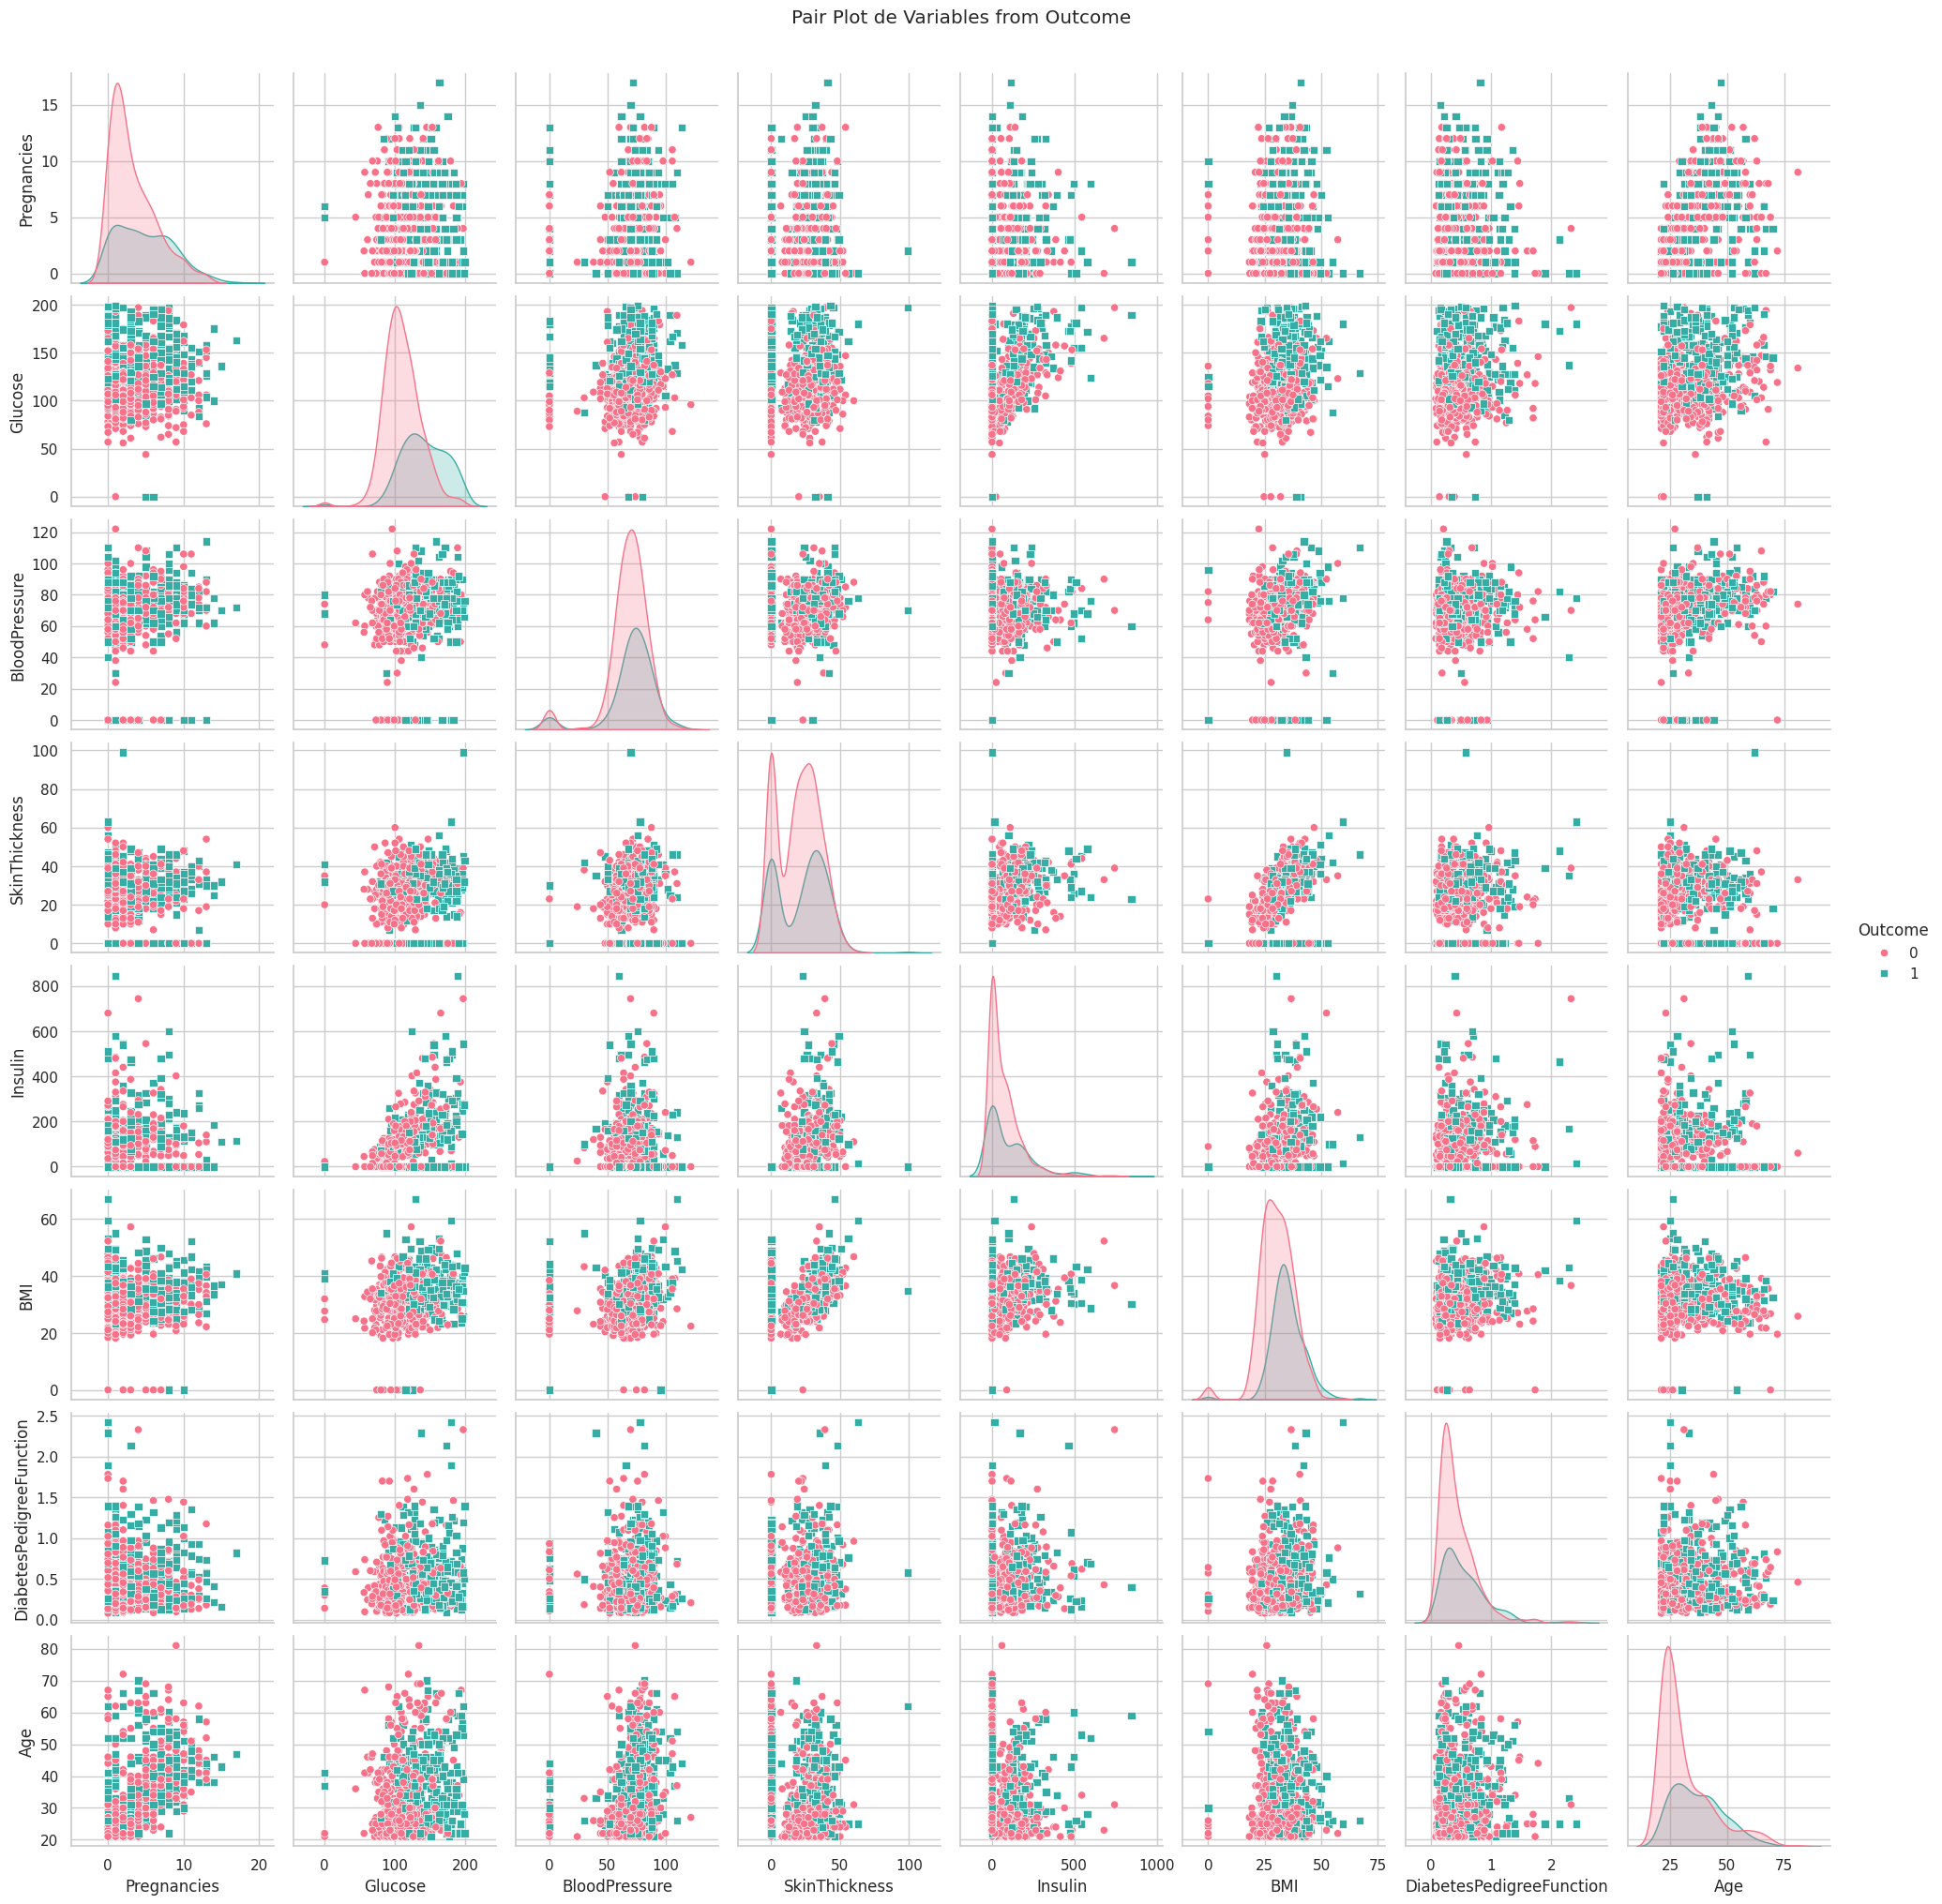

In [21]:
# Select all variables
variables_interes = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Create a subset of the data
subset_data = total_data[variables_interes]

# Creete pair plot
sns.pairplot(subset_data, hue="Outcome", markers=["o", "s"], palette="husl")
plt.suptitle("Pair Plot de Variables from Outcome", y=1.02)
plt.show()


Dealing with 0 values

In [31]:
# Count the number of rows with at least a value 0
num_filas_con_0 = (total_data == 0).any(axis=1).sum()

# Print the number of rows with 0 values
print(f"Number of rows including 0 values: {num_filas_con_0}")
# Filtrar las filas con al menos un valor igual a 0
filas_con_0 = total_data[(total_data == 0).any(axis=1)]

# Show resulting rows
print("Filas con al menos un valor igual a 0:")
print(filas_con_0)


Number of rows including 0 values: 657
Filas con al menos un valor igual a 0:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Ag

We decided to keep values ​​at 0, in this case, if we eliminate the 0 values ​​of the outcome that is committed as a boolean, the model will not predict correctly.

✨ Data Cleaning - Feature engineering

In [32]:
# Create a backup of the original DataFrame
total_data_backup = total_data.copy()

# Dictionary to store the count of values outside the limits for each variable
out_of_limit_values = {}

# Calculate upper and lower limits for outlier detection for each variable
for variable in total_data.columns:
    variable_stats = total_data[variable].describe()

    iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * iqr
    lower_limit = variable_stats["25%"] - 1.5 * iqr

    # Identify values outside the limits
    upper_values = total_data[total_data[variable] > upper_limit]
    lower_values = total_data[total_data[variable] < lower_limit]

    # Store count in the dictionary
    out_of_limit_values[variable] = {
        'upper': len(upper_values),
        'lower': len(lower_values)
    }

    print(f"\nUpper and lower limits for outlier detection of {variable}:")
    print(f"Upper: {round(upper_limit, 2)}, Lower: {round(lower_limit, 2)}, Interquartile Range: {round(iqr, 2)}")
    print(f"Number of values above the upper limit: {len(upper_values)}")
    print(f"Number of values below the lower limit: {len(lower_values)}")


Upper and lower limits for outlier detection of Pregnancies:
Upper: 13.5, Lower: -6.5, Interquartile Range: 5.0
Number of values above the upper limit: 4
Number of values below the lower limit: 0

Upper and lower limits for outlier detection of Glucose:
Upper: 202.12, Lower: 37.12, Interquartile Range: 41.25
Number of values above the upper limit: 0
Number of values below the lower limit: 5

Upper and lower limits for outlier detection of BloodPressure:
Upper: 107.0, Lower: 35.0, Interquartile Range: 18.0
Number of values above the upper limit: 7
Number of values below the lower limit: 38

Upper and lower limits for outlier detection of SkinThickness:
Upper: 80.0, Lower: -48.0, Interquartile Range: 32.0
Number of values above the upper limit: 1
Number of values below the lower limit: 0

Upper and lower limits for outlier detection of Insulin:
Upper: 318.12, Lower: -190.88, Interquartile Range: 127.25
Number of values above the upper limit: 34
Number of values below the lower limit: 0


In [34]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


👨‍💻Feature Selection

In [35]:
# Feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

X = total_data.drop("Outcome", axis = 1)
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(k = 7)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [36]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


✨Guardar conjunto de datos 

In [37]:
X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

🌼Decision Tree

In [38]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


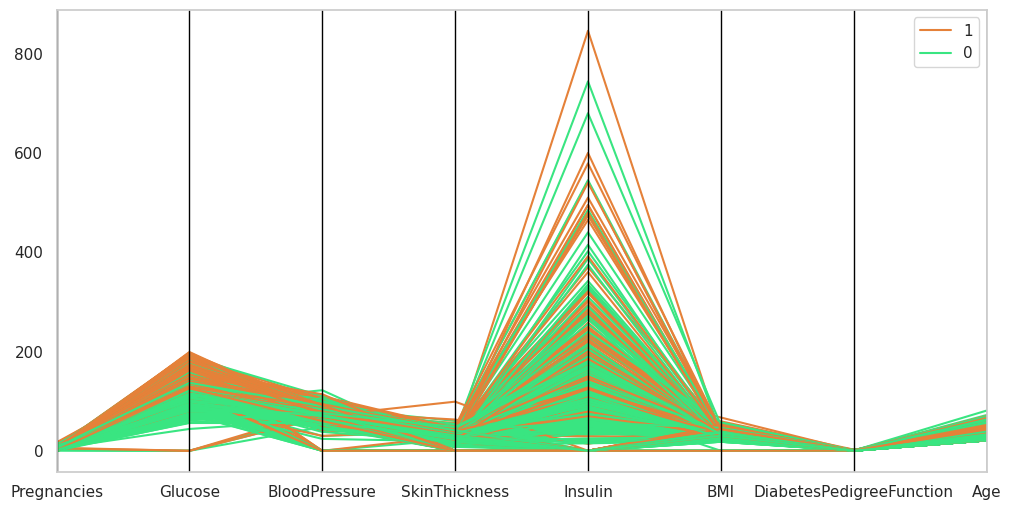

In [39]:
#Graphics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

Moving forward, we perform splitting on two data sets (train_data and test_data) into feature sets and labels for training and testing, respectively.

It is common to perform this separation before training and evaluating machine learning models to ensure that the model does not see test data during training and can be evaluated impartially.

In [40]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

Performing training model

In [41]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print("Matriz de Confusión:")
print(cm)


Matriz de Confusión:
[[81 18]
 [17 38]]


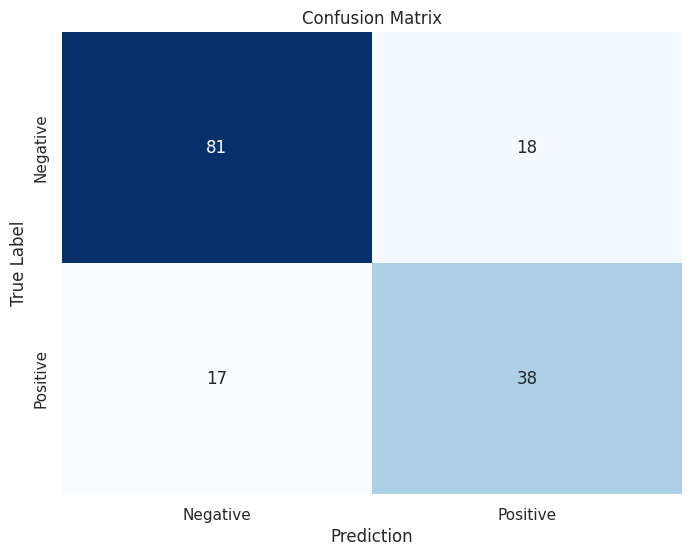

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap with seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])

# Add labels and title
plt.xlabel('Prediction')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



✅True Positives (TP): 81

This indicates the number of instances that actually belong to the positive class and that the model has correctly classified as positive.

⛔False Positives (FP): 18

These are cases where the model has incorrectly classified instances that do not belong to the positive class as positive.

⛔False Negatives (FN): 17

These are cases where the model has incorrectly classified instances that belong to the positive class as negative.

✅True Negatives (TN): 38

This indicates the number of instances that do not actually belong to the positive class and that the model has correctly classified as negative

In summary:

The positive class appears to have a good number of true positives (81), indicating that the model is correctly identifying instances of that class.

There are some false positives (18), suggesting that the model is making errors by classifying instances that do not belong to the positive class as positive.

There are also some false negatives (17), indicating that the model is not correctly classifying all instances belonging to the positive class.

The negative class seems to have a good number of true negatives (38), indicating that the model is correctly identifying instances that do not belong to the positive class as negative.

🌼Tree Representation

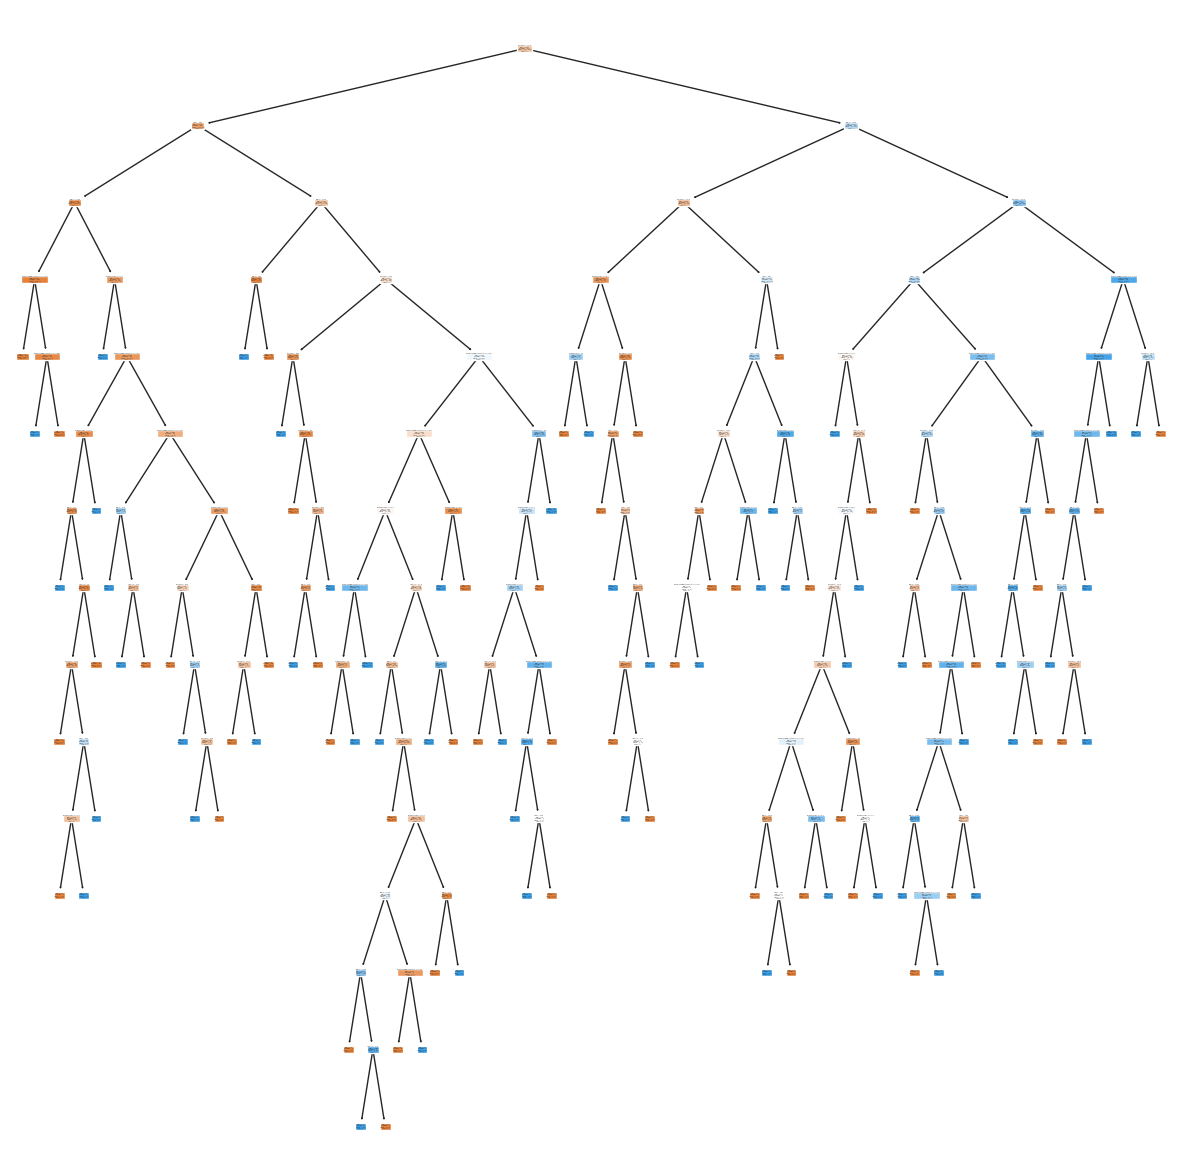

In [43]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

fig.savefig('arbol_decision_tree.png')

plt.show()

Prediction calculation using a trained model (model) on a test data set (X_test).

In [44]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [46]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7597402597402597


In [47]:
#save model file
import pickle
with open('modelo_decision_tree.pkl', 'wb') as file:
    pickle.dump(model, file)

👨‍💻Model optimization

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],  # Method to choose the division at each node
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2", None],  # Maximum number of characteristics to consider in each division
    "max_leaf_nodes": [None, 10, 20, 30],
    "min_impurity_decrease": [0.0, 0.1, 0.2]  # Threshold to consider splitting based on impurity reduction
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                              min_samples_leaf=4,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': [None, 10, 20, 30],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [59]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [63]:
from sklearn.tree import DecisionTreeClassifier

# Best hyperparameters obtained from the grid search
best_hyperparams = {
    'criterion': 'entropy', 
    'max_depth': None,
    'max_features': None,
    'max_leaf_nodes': 10,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'splitter': 'best'
}

# Create the model with the best hyperparameters
best_model = DecisionTreeClassifier(**best_hyperparams, random_state=42)

# Train the model with the training data
best_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=42)

In [64]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [65]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [66]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7727272727272727

Save Model

In [67]:
from pickle import dump

dump(model, open("../models/tree_classifier_optimized.sav", "wb"))

Load Model

In [ ]:
'''from pickle import load
from sklearn.tree import DecisionTreeClassifier

# load the model from file
loaded_model = load(open("../models/tree_classifier_optimized.sav", "rb"))'''